#We need pandas, geopandas and matplotlib.pyplot
#also have to import descartes here or geopandas oddly can't do it from within jupyter

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch 

#plot the basic map

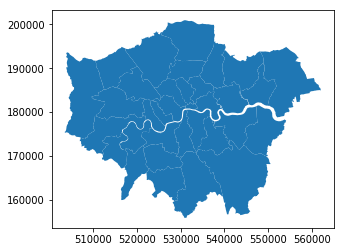

In [2]:
fp='/home/sue/Dropbox/Data/testLondonMap/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp); #read in data
map_df.plot()

#import dataset with useful indexes such as population density, happiess index, mortality rate, ect. 

In [3]:
df = pd.read_csv('london-borough-profiles_data.csv', header=0)

df.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


#select columns of interest

In [4]:
df=df[['Area name','Happiness score 2011-14 (out of 10)','Anxiety score 2011-14 (out of 10)','Population density (per hectare) 2017','Mortality rate from causes considered preventable 2012/14']]


#tidy up columns's names for simplisity

In [5]:
data_for_map = df.rename(index=str,columns={'Happiness score 2011-14 (out of 10)':'happiness', 'Anxiety score 2011-14 (out of 10)':'anxiety','Population density (per hectare) 2017':'pop_density_per_hec','Mortality rate from causes considered preventable 2012/14':'mortality'})

#join the geodataframe with the cleaned up csv dataframe

In [6]:
merged = map_df.set_index('NAME').join(data_for_map.set_index('Area name'))

#quickly cross reference the acuracy of merged dataset with one of the parents
#print(merged[['pop_density_per_hec']])
#print(data_for_map[['Area name','pop_density_per_hec']])

#merged.dtypes
#it seems the data type of interested columns are in object data type

In [7]:
merged.pop_density_per_hec = merged.pop_density_per_hec.astype(float)

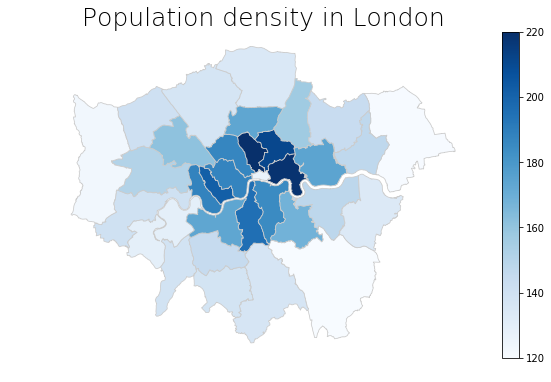

In [9]:
# set a variable that will call whatever column we want to visualise on the map

variable = 'pop_density_per_hec'

# set the range for the choropleth

vmin, vmax = 120, 220

# create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10, 6))

#create map

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm)

# add a title

ax.set_title('Population density in London', fontdict={'fontsize': '25', 'fontweight' : '3'});